In [11]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_activity = pd.read_csv('thesis__data_res.csv', usecols = ['MORTSTAT', 'AGE', 
                                                             'MOD10DMIN', 'MOD10FWK', 'VIG10DMIN', 'VIG10FWK', 'STRONGFWK'])

In [13]:
# only samples tracked for mortalisty status
df_activity = df_activity[(df_activity['MORTSTAT']==1) | (df_activity['MORTSTAT']==2)]

In [14]:
# fix featue value

# MOD10FWK
# make never, unable, less than once a week as 0
df_activity['MOD10FWK'] = df_activity['MOD10FWK'].replace({94: 0, 95: 0, 96: 0})
# remove samples wihtout data
df_activity = df_activity[(df_activity['MOD10FWK']<=93)]
# top code at 14 times per week
df_activity['MOD10FWK'] = df_activity['MOD10FWK'].clip(upper=14)

# VIG10FWK
# make never, unable, less than once a week as 0
df_activity['VIG10FWK'] = df_activity['VIG10FWK'].replace({94: 0, 95: 0, 96: 0})
# remove samples wihtout data
df_activity = df_activity[(df_activity['VIG10FWK']<=93)]
# top code at 14 times per week
df_activity['VIG10FWK'] = df_activity['VIG10FWK'].clip(upper=14)

# STRONGFWK
# make never, unable, less than once a week as 0
df_activity['STRONGFWK'] = df_activity['STRONGFWK'].replace({94: 0, 95: 0, 96: 0})
# remove samples wihtout data
df_activity = df_activity[(df_activity['STRONGFWK']<=93)]
# top code at 14 times per week
df_activity['STRONGFWK'] = df_activity['STRONGFWK'].clip(upper=14)

# MOD10DMIN
# unverse already fixed
# removepeople who refused to answer
df_activity = df_activity[(df_activity['MOD10DMIN']<=996)]
# top code
df_activity['MOD10DMIN'] = df_activity['MOD10DMIN'].clip(upper=180)

# VIG10DMIN
# unverse already fixed
# removepeople who refused to answer
df_activity = df_activity[(df_activity['VIG10DMIN']<=996)]
# top code
df_activity['VIG10DMIN'] = df_activity['VIG10DMIN'].clip(upper=180)

In [15]:
# group by age and calculate the mean for each feature
mod_means = df_activity.groupby('AGE')['MOD10FWK'].mean()
vig_means = df_activity.groupby('AGE')['VIG10FWK'].mean()
strong_means = df_activity.groupby('AGE')['STRONGFWK'].mean()
mod_dmin_means = df_activity.groupby('AGE')['MOD10DMIN'].mean()
vig_dmin_means = df_activity.groupby('AGE')['VIG10DMIN'].mean()

In [16]:
# compute same statsitics considering only samples that do respective activities

# MOD10FWK
df_activity_MOD10FWK = df_activity.copy()
df_activity_MOD10FWK = df_activity_MOD10FWK[df_activity_MOD10FWK['MOD10FWK']>0]
mod_means_does = df_activity_MOD10FWK.groupby('AGE')['MOD10FWK'].mean()

# VIG10FWK
df_activity_VIG10FWK = df_activity.copy()
df_activity_VIG10FWK = df_activity_VIG10FWK[df_activity_VIG10FWK['VIG10FWK']>0]
vig_means_does = df_activity_VIG10FWK.groupby('AGE')['VIG10FWK'].mean()

# STRONGFWK
df_activity_STRONGFWK = df_activity.copy()
df_activity_STRONGFWK = df_activity_STRONGFWK[df_activity_STRONGFWK['STRONGFWK']>0]
strong_means_does = df_activity_STRONGFWK.groupby('AGE')['STRONGFWK'].mean()

# MOD10DMIN
df_activity_MOD10DMIN = df_activity.copy()
df_activity_MOD10DMIN = df_activity_MOD10DMIN[df_activity_MOD10DMIN['MOD10DMIN']>0]
mod_dmin_means_does = df_activity_MOD10DMIN.groupby('AGE')['MOD10DMIN'].mean()

# VIG10DMIN
df_activity_VIG10DMIN = df_activity.copy()
df_activity_VIG10DMIN = df_activity_VIG10DMIN[df_activity_VIG10DMIN['VIG10DMIN']>0]
vig_dmin_means_does = df_activity_VIG10DMIN.groupby('AGE')['VIG10DMIN'].mean()

In [17]:
# ploting

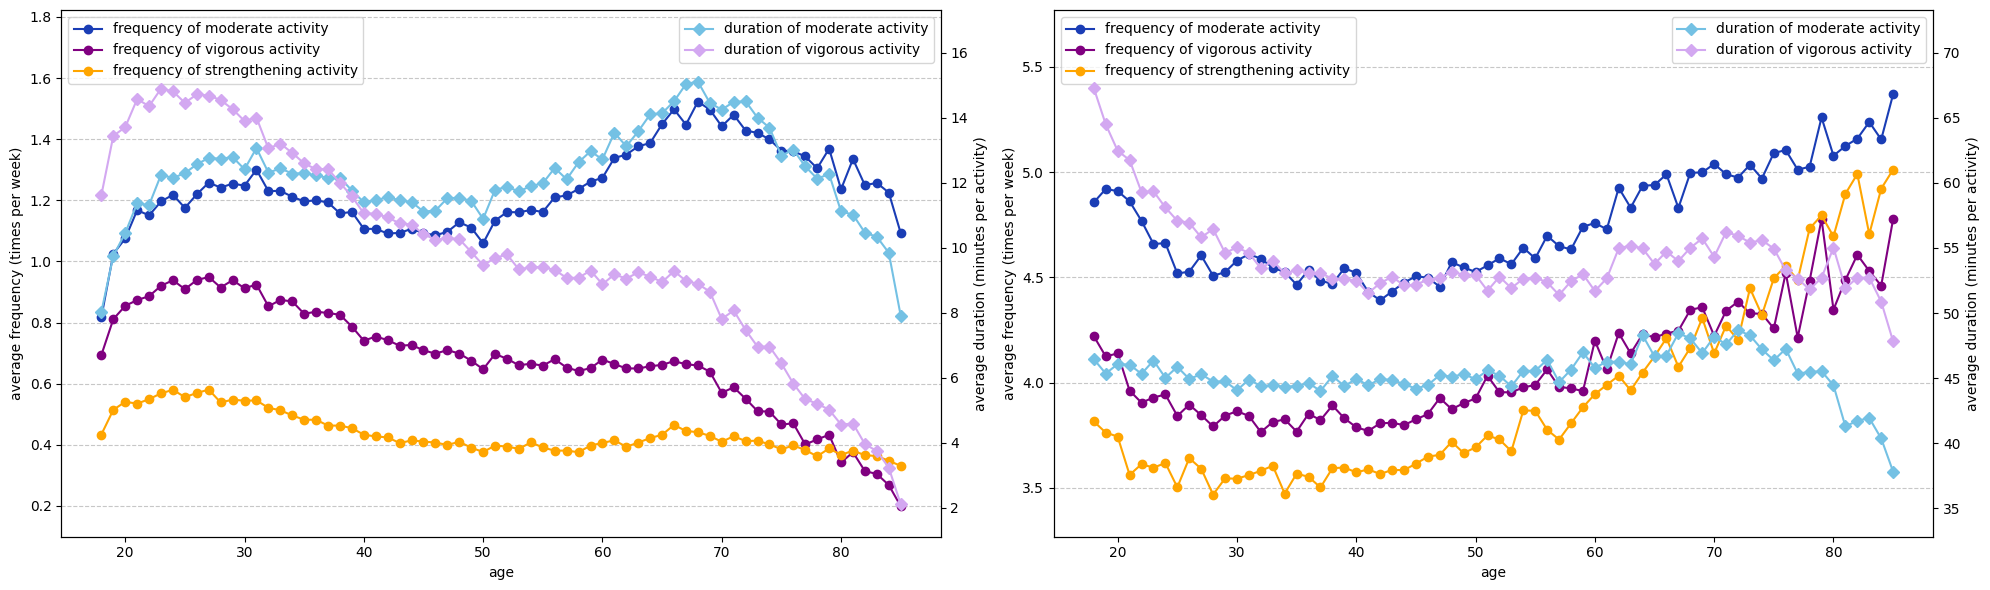

In [24]:
# create the figure and axis objects for both plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})

# plot the first graph (df_activity)
ax1.plot(mod_means.index, mod_means.values, marker='o', label='frequency of moderate activity', color='#1A3DB5')
ax1.plot(vig_means.index, vig_means.values, marker='o', label='frequency of vigorous activity', color='purple')
ax1.plot(strong_means.index, strong_means.values, marker='o', label='frequency of strengthening activity', color='orange')
ax1.set_ylabel('average frequency (times per week)')
ax1.set_xlabel('age')
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

# create a second y-axis for the last two features for the first graph
ax3 = ax1.twinx()
ax3.plot(mod_dmin_means.index, mod_dmin_means.values, marker='D', label='duration of moderate activity', color='#74C1E4')
ax3.plot(vig_dmin_means.index, vig_dmin_means.values, marker='D', label='duration of vigorous activity', color='#D3A8F1')
ax3.set_ylabel('average duration (minutes per activity)')
ax3.tick_params(axis='y')

# adjust y-axis limits for the first graph
ax1.set_ylim(bottom=min(mod_means.min(), vig_means.min(), strong_means.min()) - 0.1, 
             top=max(mod_means.max(), vig_means.max(), strong_means.max()) + 0.3)
ax3.set_ylim(bottom=min(mod_dmin_means.min(), vig_dmin_means.min()-1), 
             top=max(mod_dmin_means.max(), vig_dmin_means.max())+2.2)

# plot the second graph (df_activity_does)
ax2.plot(mod_means_does.index, mod_means_does.values, marker='o', label='frequency of moderate activity', color='#1A3DB5')
ax2.plot(vig_means_does.index, vig_means_does.values, marker='o', label='frequency of vigorous activity', color='purple')
ax2.plot(strong_means_does.index, strong_means_does.values, marker='o', label='frequency of strengthening activity', color='orange')
ax2.set_ylabel('average frequency (times per week)')
ax2.set_xlabel('age')
ax2.tick_params(axis='y')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(loc='upper left')

# create a second y-axis for the last two features for the second graph
ax4 = ax2.twinx()
ax4.plot(mod_dmin_means_does.index, mod_dmin_means_does.values, marker='D', label='duration of moderate activity', color='#74C1E4')
ax4.plot(vig_dmin_means_does.index, vig_dmin_means_does.values, marker='D', label='duration of vigorous activity', color='#D3A8F1')
ax4.set_ylabel('average duration (minutes per activity)')
ax4.tick_params(axis='y')

# adjust y-axis limits for the second graph
ax2.set_ylim(bottom=min(mod_means_does.min(), vig_means_does.min(), strong_means_does.min()) - 0.2, 
             top=max(mod_means_does.max(), vig_means_does.max(), strong_means_does.max()) + 0.4)
ax4.set_ylim(bottom=min(mod_dmin_means_does.min(), vig_dmin_means_does.min())-5, 
             top=max(mod_dmin_means_does.max(), vig_dmin_means_does.max())+6)

# add the legends for both right y-axes
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.savefig('p_activity_all_and_active_people.png', format='png')
plt.show()